# PD5 - Adam Frej

## Import paczek i danych:

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
clustering_df = pd.read_csv("clustering.csv")

In [3]:
clustering_df.head()

,4.178890744399839718e+01,5.222018158503714602e+01
0,-96.586516,90.957033
1,-54.143591,-99.153377
2,19.929231,-45.859779
3,-82.941076,84.099186
4,13.389996,-4.016202


## Pierwsza klasteryzacja:

### Wybór liczby klastrów:
Spróbujmy wybrać liczbę klastrów metodą łokcia. Jest to naturalna metoda dla klasteryzacji k-średnich, którą zastosujemy później. w tej metodzie liczymy sumę odległości punktów od środków ich klastrów. Później na wykresie odległości od liczby klastrów znajdujemy przegięcie.

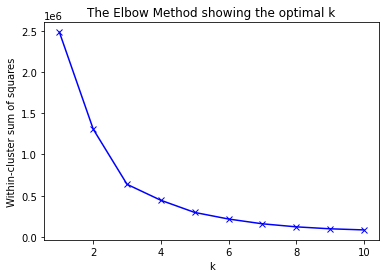

In [33]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

wcss_vec = count_wcss_scores(clustering_df, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Jak widać nie ma wyraźnego przegięcia. Ciężko jest wybrać odpowiednią liczbę skupień. 6,7,8 wydają się być dobre.\
Spróbujmy jednak zastosować inną metodę.\
Metoda silhouette:

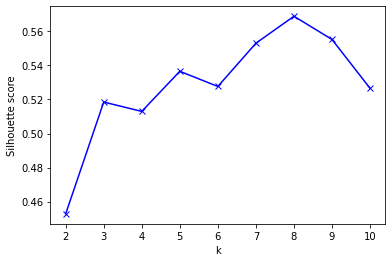

In [40]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(clustering_df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Tutaj szukamy największego punktu na wykresie. Wykres pokazuje jak średnio punkty "dobrze" pasują do klastra. Ta metoda już wskazała tylko jedną odpowiedź: 8.

Zatem zastosujmy klasteryzajcę k-średnich dla 8 skupień:

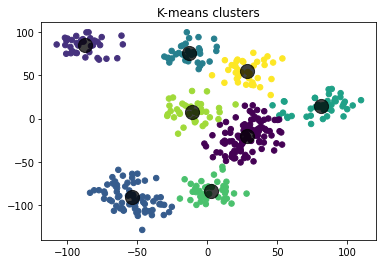

In [37]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()
plot_kmeans_clusters(clustering_df, 8)

## Druga klasteryzacja:
Tutaj stosujemy klasteryzację aglomeracyjną. Postanowiłem dostosować liczbę skupień za pomocą distance_threshold. Czyli ustaliłem, że wewnątrz każdego klastra odległości między punktami nie powinny być większe niż 80. Jest to nieco mniej niż połowa rozpiętości zmiennych. Jak widać klastry się utworzyły dosyć dobrze.

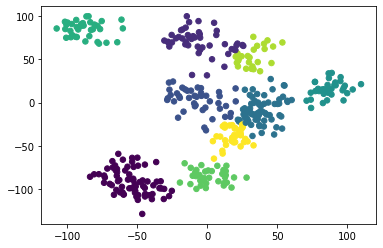

In [62]:
model = AgglomerativeClustering(n_clusters=None, linkage='complete', distance_threshold=80)
y = model.fit_predict(clustering_df)
plt.scatter(clustering_df.iloc[:,0], clustering_df.iloc[:,1], c=y, s=30, cmap='viridis')
plt.show()